# Importations

In [1]:
# import sys
MOD_DIR = '/Users/louis/cours_v_guigue/game-learning'

# if MOD_DIR not in sys.path:
#     sys.path.append(MOD_DIR)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
import random
import seaborn as sns

from sklearn import datasets
from sklearn import svm, naive_bayes
from sklearn import tree
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.model_selection import cross_val_score

In [2]:
from mod.wine_regression import *

## Directory

In [3]:
INPUT_DIR = "./data/winequality_data.csv"

# Importation des données et pre-processing

In [4]:
data = pd.read_csv(INPUT_DIR)
data.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
X = data.loc[:, data.columns!="quality"]
y = data["quality"]
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


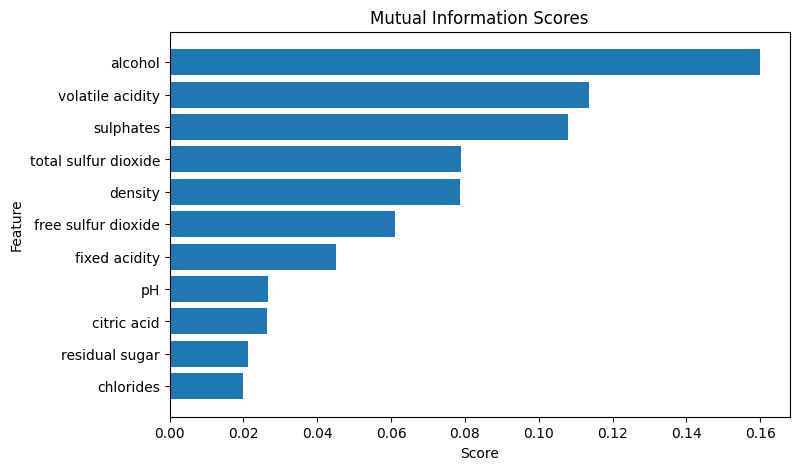

In [9]:
mi_scores = mutual_info_scores(X, y)

plt.figure(dpi=100, figsize=(8, 5))
plt.xlabel("Score")
plt.ylabel("Feature")
plot_utility_scores(mi_scores)

Nous pouvons voir sur le graphique ci-dessus que l'alcool explique majoritairement la qualité du vin.

Nous remarquons au contraire plusieurs caractéristiques (fixed_acidity, chlorides, residual sugar, free sulfur dioxide et pH) dont le score d'information mutuelle est inférieur à 0.05.Nous allons donc nous affranchir de ces informatons qui semblent moins significatives pour la prédiction.

In [10]:
X = X.drop(["free sulfur dioxide","residual sugar","pH","volatile acidity","density","total sulfur dioxide","chlorides"], axis = 1)
X.head()

,fixed acidity,citric acid,sulphates,alcohol
0,7.4,0.00,0.56,9.4
1,7.8,0.00,0.68,9.8
2,7.8,0.04,0.65,9.8
3,11.2,0.56,0.58,9.8
4,7.4,0.00,0.56,9.4


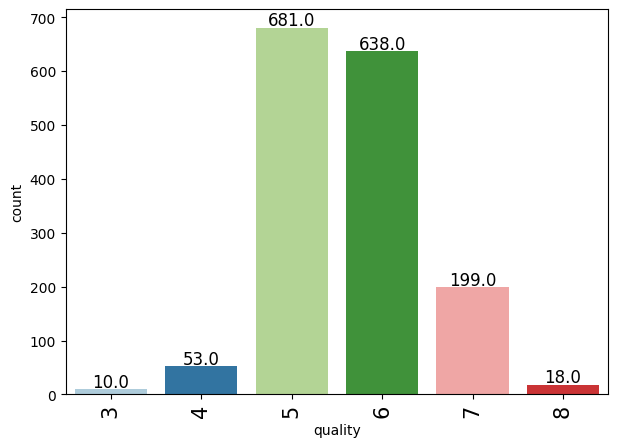

In [11]:
labeled_barplot(data, "quality")

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
print(f'Training data:\n{X_train[0:5]}\nTest data:\n{X_test[0:5]}')

Training data:
     fixed acidity  citric acid  sulphates  alcohol
493            8.7         0.31       0.74     11.6
354            6.1         0.40       0.59     11.9
342           10.9         0.47       0.75      9.8
834            8.8         0.26       0.47      9.4
705            8.4         0.15       0.49      9.9
Test data:
      fixed acidity  citric acid  sulphates  alcohol
803             7.7         0.08       0.66      9.6
124             7.8         0.17       0.48      9.5
350            10.7         0.22       0.98      9.9
682             8.5         0.31       0.54      9.8
1326            6.7         0.24       0.60     10.6


In [14]:
# Entraîner un modèle de régression linéaire non-normalisé
mod_non_norm = LinearRegression()
scores = cross_val_score(mod_non_norm, X_train, y_train, cv=10)
print("Score sans normalisation des données :", scores.mean())

Score sans normalisation des données : 0.26529139188817696


In [15]:
# Entraîner un modèle de régression linéaire avec normalisation des données
scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train)

mod_norm = LinearRegression()
scores_norm = cross_val_score(mod_norm, X_train_norm, y_train, cv=10)
print("Score avec normalisation des données :", scores_norm.mean())


Score avec normalisation des données : 0.265291391888177


In [16]:
X_test_norm = scaler.fit_transform(X_test)

In [17]:
print(f'Training data:\n{X_train_norm[0:5]}\nTest data:\n{X_test_norm[0:5]}')

Training data:
[[0.36283186 0.31       0.22699387 0.49230769]
 [0.13274336 0.4        0.13496933 0.53846154]
 [0.55752212 0.47       0.23312883 0.21538462]
 [0.37168142 0.26       0.06134969 0.15384615]
 [0.33628319 0.15       0.07361963 0.23076923]]
Test data:
[[0.25714286 0.10126582 0.32038835 0.21428571]
 [0.26666667 0.21518987 0.14563107 0.19642857]
 [0.54285714 0.27848101 0.63106796 0.26785714]
 [0.33333333 0.39240506 0.2038835  0.25      ]
 [0.16190476 0.30379747 0.26213592 0.39285714]]


> <span style="color:magenta"> Nous nous attendions à ce que le modèle 1 soit meilleur que le 2 car... </span>

In [18]:
y_train_norm = y_train.astype('float32').to_numpy().astype(np.float32)
y_test_norm = y_test.astype('float32').to_numpy().astype(np.float32)

In [19]:
lr = 0.01
num_epochs = 20
batch_size = 10

In [20]:
num_examples = len( X_train)
indices = list(range(num_examples))
random.shuffle(indices)

In [21]:
for X, y in generator_batch(batch_size, X_train_norm, y_train_norm):
    print(X,'\n',X.shape[0], '\n', y)
    break

[[0.27433628 0.37       0.20858896 0.56923077]
 [0.47787611 0.11       0.06134969 0.2       ]
 [0.28318584 0.01       0.05521472 0.21538462]
 [0.13274336 0.08       0.19018405 0.29230769]
 [0.39823009 0.3        0.20858896 0.32307692]
 [0.22123894 0.3        0.76687117 0.16923077]
 [0.23893805 0.         0.14110429 0.15384615]
 [0.38053097 0.21       0.28220859 0.41538462]
 [0.33628319 0.22       0.12269939 0.23076923]
 [0.38938053 0.49       0.14723926 0.12307692]] 
 10 
 [6. 5. 5. 6. 6. 5. 5. 6. 6. 5.]


In [22]:
w,b =  initialize_params(X_train_norm)
epoch_list = []
cost_list = []
loss_array = np.empty((0, 2), np.float32)
for epoch in range(num_epochs):
    for X, y in generator_batch(batch_size, X_train_norm, y_train_norm):
             w,b = mbgd(X, y,[w,b], X.shape[0], lr)
    train_cost = mean_squared_loss(linear_regression(X_train_norm, w, b), y_train_norm)
    epoch_list.append(epoch+1)
    cost_list.append(train_cost)
    print(f'learning rate = {lr}, epoch = {epoch + 1}, training cost = {float(train_cost):f}')

learning rate = 0.01, epoch = 1, training cost = 0.593481
learning rate = 0.01, epoch = 2, training cost = 0.517277
learning rate = 0.01, epoch = 3, training cost = 0.476821
learning rate = 0.01, epoch = 4, training cost = 0.443699
learning rate = 0.01, epoch = 5, training cost = 0.415158
learning rate = 0.01, epoch = 6, training cost = 0.392288
learning rate = 0.01, epoch = 7, training cost = 0.372354
learning rate = 0.01, epoch = 8, training cost = 0.356603
learning rate = 0.01, epoch = 9, training cost = 0.343081
learning rate = 0.01, epoch = 10, training cost = 0.332083
learning rate = 0.01, epoch = 11, training cost = 0.322876
learning rate = 0.01, epoch = 12, training cost = 0.315152
learning rate = 0.01, epoch = 13, training cost = 0.308884
learning rate = 0.01, epoch = 14, training cost = 0.303486
learning rate = 0.01, epoch = 15, training cost = 0.299251
learning rate = 0.01, epoch = 16, training cost = 0.295478
learning rate = 0.01, epoch = 17, training cost = 0.292395
learni

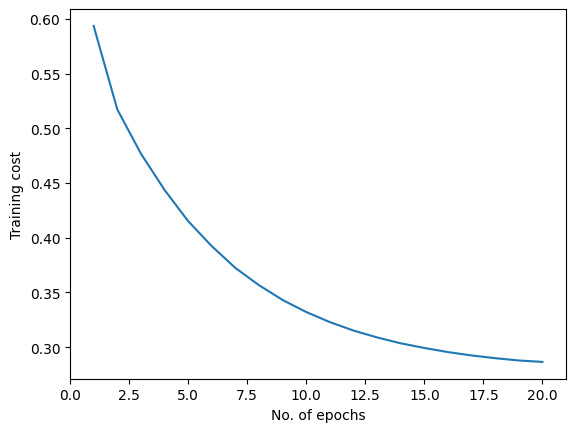

In [23]:
plt.plot(epoch_list,cost_list)
plt.xlabel("No. of epochs")
plt.ylabel("Training cost")
plt.xlim(0,21)
plt.show()

In [25]:
y_test_pred = linear_regression(X_test_norm,w,b)
y_train_pred = linear_regression(X_train_norm,w,b)
test_MSE  = mean_squared_loss(y_test_pred,y_test_norm).mean()
train_MSE = mean_squared_loss(y_train_pred,y_train_norm).mean()
print(f'Test error is {test_MSE}\nTrain error is {train_MSE}')

Test error is 0.2906666642500039
Train error is 0.2864870248441233
